In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 15

In [261]:
def get_train_set():
    cwd = os.getcwd()
    path = os.path.join(cwd,'data')
    titanic_train_path =  os.path.join(path , 'train.csv')
    titanic_test_path = os.path.join(path, 'test.csv')
    titanic_gender_path = os.path.join(path, 'gender_submission.csv')

    gender_df = pd.read_csv(titanic_gender_path)
    test_csv = pd.read_csv(titanic_test_path)
    train_csv = pd.read_csv(titanic_train_path)
    
    test_gender_df = test_csv.merge(gender_df, left_on='PassengerId', right_on='PassengerId')
    train_df = pd.concat([train_csv, test_gender_df], ignore_index=True, sort = False)
    train_df.set_index('PassengerId', inplace=True)
    
    return train_df

In [262]:
from sklearn.preprocessing import LabelEncoder

def get_label_encoder(df, columns_to_encode):
    columns_to_encode = [col for col in df.columns.to_list() if df.nunique()[col]<=5]
    df = df.copy()

    for col in columns_to_encode:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

In [263]:
train_df = get_train_set()

In [264]:
train_df.shape

(1309, 11)

In [265]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
train_df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin        186
Embarked       3
dtype: int64

In [267]:
train_df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [268]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [269]:
train_df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [270]:
train_df['Fare'] = train_df['Fare'].mask(train_df['Fare'].isna(), train_df['Fare'].mean())
train_df['Fare'] = pd.cut(train_df['Fare'], bins=[0, 7.89, 14.45, 31.27, 512.32], labels=['small','enough',
                                                                                      'more than enough', 'many'])
# train_df['Fare'] = train_df['Fare'].mask(train_df['Fare']==0, train_df['Fare'].mean())

# a = train_df['Fare'].quantile(0.25)
# b = train_df['Fare'].quantile(0.75)
# train_df = train_df[train_df['Fare']< b+(b-a)*1.5]

# train_df['Fare'] = train_df['Fare'].mask(train_df['Fare']==0, train_df['Fare'].mean())
# train_df['Fare'] = train_df.mask(train_df['Fare'] > b+(b-a)*1.5, train_df[Fare].mean())

In [271]:
# train_df['Fare'] = train_df['Fare'].mask(train_df['Fare']==0, train_df['Fare'].mean())

In [272]:
train_df = get_label_encoder(train_df, ['Sex', 'Fare'])

In [273]:
# train_df['Fare_Category'] = train_df['Fare_Category'].mask(train_df['Fare_Category']==0, train_df['Fare_Category'].median())

In [274]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean()).astype('int64')
train_df['Age'] = train_df['Age'].mask(train_df['Age'] == 0, train_df['Age'].mean())
train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 18, 35, 60, 80], labels=['child','mid',
                                                                                      'mid_old','old'])
# train_df['Age'] = train_df['Age'].mask(train_df['Age']<18, 1)
# train_df['Age'] = train_df['Age'].mask(
#     (train_df['Age']>=18) & (train_df['Age']<=40), 2)
# train_df['Age'] = train_df['Age'].mask(
#     (train_df['Age']>=40) & (train_df['Age']<60), 3)
# train_df['Age'] = train_df['Age'].mask(train_df['Age']>=60, 4)

In [275]:
train_df['Age'].value_counts()

mid        803
mid_old    290
child      184
old         32
Name: Age, dtype: int64

In [276]:
train_df['Family'] = train_df['Parch']+train_df['SibSp']
train_df['Alone'] = train_df['Family'] == 0

In [277]:
# train_df.dropna(inplace=True)

In [278]:
train_df.dtypes

Survived       int64
Pclass         int64
Name          object
Sex            int64
Age         category
SibSp          int64
Parch          int64
Ticket        object
Fare           int64
Cabin         object
Embarked       int64
Family         int64
Alone           bool
dtype: object

In [279]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
PassengerId,,,,,,,,,,,,,
1,0,2,"Braund, Mr. Owen Harris",1,mid,1,0,A/5 21171,3,NaN,2,1,False
2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,mid_old,1,0,PC 17599,1,C85,0,1,False
3,1,2,"Heikkinen, Miss. Laina",0,mid,0,0,STON/O2. 3101282,0,NaN,2,0,True
4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,mid,1,0,113803,1,C123,2,1,False
5,0,2,"Allen, Mr. William Henry",1,mid,0,0,373450,0,NaN,2,0,True


In [280]:
train_df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family,Alone
Survived,1.000000,-0.264710,-0.688371,0.002370,0.108919,-0.010694,-0.132420,0.061090,-0.216299
Pclass,-0.264710,1.000000,0.124617,0.060832,0.018322,0.150777,0.182154,0.050027,0.147393
Sex,-0.688371,0.124617,1.000000,-0.109609,-0.213125,0.004762,0.095215,-0.188583,0.284537
SibSp,0.002370,0.060832,-0.109609,1.000000,0.373587,-0.033289,0.064519,0.861952,-0.591077
Parch,0.108919,0.018322,-0.213125,0.373587,1.000000,-0.035673,0.043835,0.792296,-0.549022
Fare,-0.010694,0.150777,0.004762,-0.033289,-0.035673,1.000000,-0.185753,-0.041394,0.022927
Embarked,-0.132420,0.182154,0.095215,0.064519,0.043835,-0.185753,1.000000,0.066396,0.063024
Family,0.061090,0.050027,-0.188583,0.861952,0.792296,-0.041394,0.066396,1.000000,-0.688864
Alone,-0.216299,0.147393,0.284537,-0.591077,-0.549022,0.022927,0.063024,-0.688864,1.000000


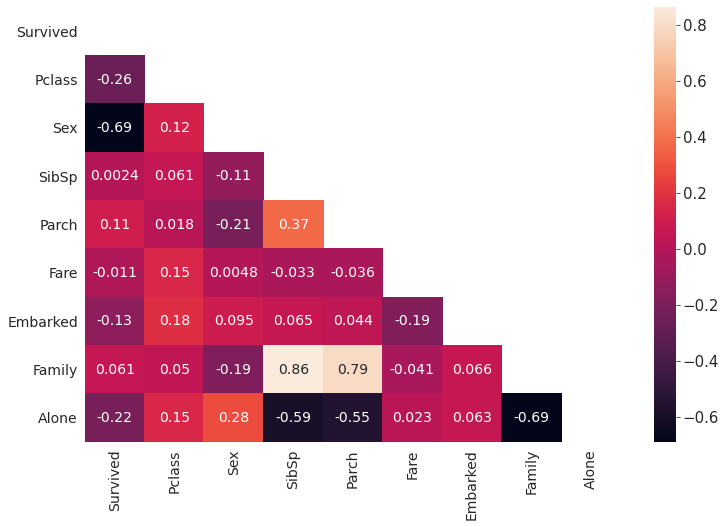

In [281]:
mask = np.zeros_like(train_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=[12,8])
sns.heatmap(train_df.corr(), mask=mask, annot=True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [282]:
col_to_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Family', 'Embarked'] # 'Embraked', 'Age'
# col_to_drop = ['Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Family', 'Age', 'Embarked', 'Fare', 'Fare_Category']
# col_to_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'first_pclass_fare', 'second_pclass_fare', 'thirth_pclass_fare', 'Family'] # 'Embraked'
train_df.drop(columns=col_to_drop, inplace=True)

In [283]:
train_df.dropna(inplace=True)

In [284]:
train_df = get_label_encoder(train_df, 'Age')

In [285]:
train_df

,Survived,Pclass,Sex,Age,Fare,Alone
PassengerId,,,,,,
1,0,2,1,1,3,0
2,1,0,0,2,1,0
3,1,2,0,1,0,1
4,1,0,0,1,1,0
5,0,2,1,1,0,1
...,...,...,...,...,...,...
1305,0,2,1,1,0,1
1306,1,0,0,2,1,1
1307,0,2,1,2,3,1


In [286]:
# Train model

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import f1_score

In [288]:
# train_size=0.6
X = train_df.drop(columns=['Survived']).copy()
y = train_df['Survived']

X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
# # In the first step we will split the data in training and remaining dataset
# X_train, X_, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# # Now since we want the valid and test size to be equal (10% each of overall data). 
# # we have to define valid_size=0.5 (that is 50% of remaining data)
# test_size = 0.5
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(f'X_train shape: {X_train.shape}'), print(f'y train shape: {y_train.shape}')
# print(f'X valid shape: {X_valid.shape}'), print(f'y valid shape: {y_valid.shape}')
print(f'X test shape: {X_test.shape}'), print(f'y test shape: {y_test.shape}')

X_train shape: (1047, 5)
y train shape: (1047,)
X test shape: (262, 5)
y test shape: (262,)


(None, None)

In [289]:
def normalize(X_train, X_test):
    print ('normalizing.')
    scaler= MinMaxScaler()
#     scaler = StandardScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled 

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)
type(X_train_scaled)

normalizing.


numpy.ndarray

In [290]:
def run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train, y_test= None):
    print ('Running GridSearchCV.')
    grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
    grid_clf.fit(X_train_scaled, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_)
    print('Grid best score (f1): ', grid_clf.best_score_)

    if not y_test is None:
        test_score= grid_clf.score(X_test_scaled, y_test)
        print("test f1= {}".format(test_score))


def run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test=None, list_classifiers= None):
    if list_classifiers is None or 'LogisticRegression' in list_classifiers:
        print ('\nLogisticRegression.')
        clf = LogisticRegression(max_iter=10000)
        grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled,  y_train,  y_test= y_test)

    if list_classifiers is None or 'DecisionTreeClassifier' in list_classifiers:
        print ('\nDecisionTreeClassifier')
        clf = DecisionTreeClassifier()       
        grid_values = {'max_depth': [2,5,7, 20, 50]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'RandomForestClassifier' in list_classifiers:
        print ('\nRandomForestClassifier.')
        clf = RandomForestClassifier()       
        grid_values = {'n_estimators': [20,50, 200, 300]} #,200,300]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_poly' in list_classifiers:
        print ('\nSVC_poly')
        clf = SVC(kernel='poly')           
        grid_values = {'C': [0.01]}# , 0.1, 1, 100, ]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_rbf' in list_classifiers:
        print ('\nSVC_rbf')
        clf = SVC(kernel='rbf')
        grid_values = {'C': [0.005, 0.01]}# , 0.02, 0.03, 0.1, 1, 100, 10000], 'gamma':[0.001, 0.01, 0.1]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'NB' in list_classifiers:
        print ('\nNB')
        clf =  GaussianNB().fit(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, clf.predict(X_train_scaled))
        print("train set f1= {}".format(train_f1))
        if not y_test is None:
            test_f1 = f1_score(y_test, clf.predict(X_test_scaled))
            print("train set f1= {}".format(test_f1))

            
    if list_classifiers is None or 'GradientBoostingClassifier' in list_classifiers:
        print ('\nGradientBoostingClassifier.')
        clf = GradientBoostingClassifier() # learning_rate = 0.03)       
        grid_values = {'max_depth': [3,5,7]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'MLP' in list_classifiers:
        print ('\nMLP.')
        clf = MLPClassifier(hidden_layer_sizes = [50]) #, 100])
        grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'xgboost' in list_classifiers:
        print ('\nxgboost.')
        clf = XGBClassifier().fit(X_train_scaled, y_train)
        y_predicted = clf.predict(X_test_scaled)
        print ('f1_score  = {:.2}'.format(f1_score(y_test, y_predicted)))

In [291]:
print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled.shape, X_test_scaled.shape))
print ('y_train set shape= {}\ny_test set shape= {}'.format(y_train.shape, y_test.shape))

X_train_scaled shape= (1047, 5)
X_test_scaled shape= (262, 5)
y_train set shape= (1047,)
y_test set shape= (262,)


In [292]:
# X_train.isna().any()
train_df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Alone       False
dtype: bool

In [293]:
list_classifiers= [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'NB',
    'GradientBoostingClassifier', 
#     'MLP', 
    'xgboost', 
    
    
   
]
run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, list_classifiers= list_classifiers)


LogisticRegression.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'C': 0.1}
Grid best score (f1):  0.7855338410817863
test f1= 0.8523206751054853

DecisionTreeClassifier
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 2}
Grid best score (f1):  0.7855338410817863
test f1= 0.8523206751054853

RandomForestClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'n_estimators': 200}
Grid best score (f1):  0.7856714863811559
test f1= 0.8546255506607928

NB
train set f1= 0.7856154910096819
train set f1= 0.8523206751054853

GradientBoostingClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.7822179950103105
test f1= 0.8484848484848485

xgboost.
[16:27:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1_sco

/home/ost/anaconda3/envs/ds_env/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ost/anaconda3/envs/ds_env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [294]:
# clf = RandomForestClassifier(n_estimators= 200)
clf = DecisionTreeClassifier(max_depth=2)

# review perfromance on whole set
from sklearn.model_selection import cross_val_score # need to manually determine the best param 
f1_train = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1')
print (f1_train.mean())
            
# train and predict X_test
clf.fit(X_train_scaled, y_train)
y_predict= clf.predict(X_test_scaled)

# make sure it produce not all zeros 
np.mean(y_predict)

0.7855338410817863


0.4618320610687023